In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [3]:
import	collections
if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable

In [4]:
# # 값 추출 확인 

# url = r"https://www.jobkorea.co.kr/Search/?stext=ai%20%EC%97%B0%EA%B5%AC%EA%B0%9C%EB%B0%9C&tabType=recruit&Page_No=1&focusGno=45252783"
# html = urlopen(url)
# soup = BeautifulSoup(html, 'html.parser')

# companys = soup.find('div', {"class":"list-section-corp"})
# companys = companys.find("a").text.strip()

# companys

In [5]:
# company_list = []

# for num in range(1, 69) :
#     page_list = f"https://www.jobkorea.co.kr/Search/?stext=ai%20%EC%97%B0%EA%B5%AC%EA%B0%9C%EB%B0%9C&tabType=recruit&Page_No={num}&focusGno=45252783"
#     html = urlopen(page_list)
#     companys = soup.find_all('div', {"class":"list-section-corp"})
    
#     for c in companys :
#         companys = c.find("a").text.strip()
#         company_list.append(companys)

# set(company_list)

In [6]:
# from urllib.request import Request

# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from urllib.parse import quote
# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# import collections

# if not hasattr(collections, 'Callable'):
#     collections.Callable = collections.abc.Callable

# def search_job(number):
#     try:
#         search_word = quote('백엔드')
#         url = f'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&recruitPage={number}&recruitPageCount=100&searchType=search&searchword={search_word}'

#         urlrequest = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
#         html = urlopen(urlrequest)

#         soup = BeautifulSoup(html, 'html.parser')
        
#         contents = soup.find('div', {'class':'content'})
#         if contents is None:
#             print(f"Page {number}: No content found.")
#             return []
        
#         items = contents.select('div.item_recruit > div.area_job > div.job_sector')
        
#         if not items:  
#             return []
#         for item in items:
#             item_string = item.text.replace('\n', '').strip()
#             print(item_string)
#     except Exception as e:
#         print(e)
#         return []
    
# for i in range(1,10):
#     search_job(i)

In [7]:
# import csv

# all_data = []
# for i in range(1, 10):
#     all_data.extend(search_job(i))

# if all_data: 
#     with open('job_data.csv', 'w', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)
#         for row in all_data:
#             writer.writerow([row])
# else:
#     print("No data found.")

In [8]:
import csv
from urllib.request import Request, urlopen
from urllib.parse import quote
from bs4 import BeautifulSoup
import collections

if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable

def search_job(number):
    try:
        search_word = quote('백엔드')
        url = f'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&recruitPage={number}&recruitPageCount=100&searchType=search&searchword={search_word}'

        urlrequest = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(urlrequest)

        soup = BeautifulSoup(html, 'html.parser')
        
        contents = soup.find('div', {'class': 'content'})
        if contents is None:
            print(f"Page {number}: No content found.")
            return []
        
        items = contents.select('div.item_recruit > div.area_job > div.job_sector')
        if not items:
            print(f"Page {number}: No job items found.")
            return []

        data = []
        for item in items:
            item_string = item.text.replace('\n', '').strip()
            data.append(item_string)
        return data

    except Exception as e:
        print(f"Error on page {number}: {e}")
        return []

all_data = []
for i in range(1, 10):
    all_data.extend(search_job(i))

if all_data:
    with open('job_data.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for row in all_data:
            writer.writerow([row])
else:
    print("No data found.")


In [9]:
df = pd.read_csv('job_data.csv', header=None, encoding='utf-8')

df = df[0].str.split(',', expand=True)

df.to_csv('job_data_split.csv', index=False, encoding='utf-8')

In [10]:
df[4].str.split("외", expand=True)

,0,1,2
0,소프트웨어개발 등록일 24/08/14,None,None
1,솔루션,등록일 24/08/02,None
2,AWS,등록일 24/07/22,None
3,Spring,등록일 24/08/09,None
4,AWS,등록일 24/07/22,None
...,...,...,...
895,AWS,등록일 24/08/13,None
896,AWS,수정일 24/07/31,None
897,AWS,수정일 24/08/12,None
898,유지보수,등록일 24/07/19,None


In [11]:
df

,0,1,2,3,4
0,백엔드/서버개발,DBA,SaaS,SQL,소프트웨어개발 등록일 24/08/14
1,백엔드/서버개발,Java,AWS,Spring,솔루션 외 등록일 24/08/02
2,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 등록일 24/07/22
3,백엔드/서버개발,Java,웹개발,프론트엔드,Spring 외 등록일 24/08/09
4,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 등록일 24/07/22
...,...,...,...,...,...
895,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 등록일 24/08/13
896,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 수정일 24/07/31
897,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 수정일 24/08/12
898,백엔드/서버개발,웹개발,프론트엔드,Javascript,유지보수 외 등록일 24/07/19


In [12]:
df = pd.read_csv('job_data.csv', header=None, encoding='utf-8')

df_split = df[0].str.split(',', expand=True)

df_extra_split = df_split[4].str.split('외', expand=True)

df_combined = pd.concat([df_split, df_extra_split], axis=1)

df_combined.to_csv('job_data_combined.csv', index=False, encoding='utf-8')


In [13]:
df_combined

,0,1,2,3,4,0,1,2
0,백엔드/서버개발,DBA,SaaS,SQL,소프트웨어개발 등록일 24/08/14,소프트웨어개발 등록일 24/08/14,None,None
1,백엔드/서버개발,Java,AWS,Spring,솔루션 외 등록일 24/08/02,솔루션,등록일 24/08/02,None
2,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 등록일 24/07/22,AWS,등록일 24/07/22,None
3,백엔드/서버개발,Java,웹개발,프론트엔드,Spring 외 등록일 24/08/09,Spring,등록일 24/08/09,None
4,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 등록일 24/07/22,AWS,등록일 24/07/22,None
...,...,...,...,...,...,...,...,...
895,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 등록일 24/08/13,AWS,등록일 24/08/13,None
896,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 수정일 24/07/31,AWS,수정일 24/07/31,None
897,백엔드/서버개발,Java,웹개발,프론트엔드,AWS 외 수정일 24/08/12,AWS,수정일 24/08/12,None
898,백엔드/서버개발,웹개발,프론트엔드,Javascript,유지보수 외 등록일 24/07/19,유지보수,등록일 24/07/19,None


In [14]:
df_combined = df_combined.drop(4, axis=1)

In [15]:
df_combined

,0,1,2,3,0,1,2
0,백엔드/서버개발,DBA,SaaS,SQL,소프트웨어개발 등록일 24/08/14,None,None
1,백엔드/서버개발,Java,AWS,Spring,솔루션,등록일 24/08/02,None
2,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/07/22,None
3,백엔드/서버개발,Java,웹개발,프론트엔드,Spring,등록일 24/08/09,None
4,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/07/22,None
...,...,...,...,...,...,...,...
895,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/08/13,None
896,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,수정일 24/07/31,None
897,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,수정일 24/08/12,None
898,백엔드/서버개발,웹개발,프론트엔드,Javascript,유지보수,등록일 24/07/19,None


In [16]:
df_combined.columns = ["벡앤드", "능력", "능력1", "능력2", "능력3", "날짜4", "삭제"]

In [17]:
df_combined

,벡앤드,능력,능력1,능력2,능력3,날짜4,삭제
0,백엔드/서버개발,DBA,SaaS,SQL,소프트웨어개발 등록일 24/08/14,None,None
1,백엔드/서버개발,Java,AWS,Spring,솔루션,등록일 24/08/02,None
2,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/07/22,None
3,백엔드/서버개발,Java,웹개발,프론트엔드,Spring,등록일 24/08/09,None
4,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/07/22,None
...,...,...,...,...,...,...,...
895,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/08/13,None
896,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,수정일 24/07/31,None
897,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,수정일 24/08/12,None
898,백엔드/서버개발,웹개발,프론트엔드,Javascript,유지보수,등록일 24/07/19,None


In [18]:
df_combined = df_combined.drop("삭제", axis=1)
df_combined

,벡앤드,능력,능력1,능력2,능력3,날짜4
0,백엔드/서버개발,DBA,SaaS,SQL,소프트웨어개발 등록일 24/08/14,None
1,백엔드/서버개발,Java,AWS,Spring,솔루션,등록일 24/08/02
2,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/07/22
3,백엔드/서버개발,Java,웹개발,프론트엔드,Spring,등록일 24/08/09
4,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/07/22
...,...,...,...,...,...,...
895,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,등록일 24/08/13
896,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,수정일 24/07/31
897,백엔드/서버개발,Java,웹개발,프론트엔드,AWS,수정일 24/08/12
898,백엔드/서버개발,웹개발,프론트엔드,Javascript,유지보수,등록일 24/07/19


In [19]:
text_df = df_combined.drop("벡앤드", axis = 1)
text_df

,능력,능력1,능력2,능력3,날짜4
0,DBA,SaaS,SQL,소프트웨어개발 등록일 24/08/14,None
1,Java,AWS,Spring,솔루션,등록일 24/08/02
2,Java,웹개발,프론트엔드,AWS,등록일 24/07/22
3,Java,웹개발,프론트엔드,Spring,등록일 24/08/09
4,Java,웹개발,프론트엔드,AWS,등록일 24/07/22
...,...,...,...,...,...
895,Java,웹개발,프론트엔드,AWS,등록일 24/08/13
896,Java,웹개발,프론트엔드,AWS,수정일 24/07/31
897,Java,웹개발,프론트엔드,AWS,수정일 24/08/12
898,웹개발,프론트엔드,Javascript,유지보수,등록일 24/07/19


In [20]:
text_df = text_df.drop("능력1", axis = 1)
text_df

,능력,능력2,능력3,날짜4
0,DBA,SQL,소프트웨어개발 등록일 24/08/14,None
1,Java,Spring,솔루션,등록일 24/08/02
2,Java,프론트엔드,AWS,등록일 24/07/22
3,Java,프론트엔드,Spring,등록일 24/08/09
4,Java,프론트엔드,AWS,등록일 24/07/22
...,...,...,...,...
895,Java,프론트엔드,AWS,등록일 24/08/13
896,Java,프론트엔드,AWS,수정일 24/07/31
897,Java,프론트엔드,AWS,수정일 24/08/12
898,웹개발,Javascript,유지보수,등록일 24/07/19


In [21]:
text_df = text_df.drop("능력3", axis = 1)
text_df

,능력,능력2,날짜4
0,DBA,SQL,None
1,Java,Spring,등록일 24/08/02
2,Java,프론트엔드,등록일 24/07/22
3,Java,프론트엔드,등록일 24/08/09
4,Java,프론트엔드,등록일 24/07/22
...,...,...,...
895,Java,프론트엔드,등록일 24/08/13
896,Java,프론트엔드,수정일 24/07/31
897,Java,프론트엔드,수정일 24/08/12
898,웹개발,Javascript,등록일 24/07/19


In [22]:
text_df = text_df.drop("날짜4", axis = 1)
text_df

,능력,능력2
0,DBA,SQL
1,Java,Spring
2,Java,프론트엔드
3,Java,프론트엔드
4,Java,프론트엔드
...,...,...
895,Java,프론트엔드
896,Java,프론트엔드
897,Java,프론트엔드
898,웹개발,Javascript


In [23]:
text_df = text_df.drop("벡앤드", axis = 1)
text_df

KeyError: "['벡앤드'] not found in axis"

In [24]:
text_df.to_csv('job_data_word.txt')

STOPWORDS :  {'his', 'for', 'too', "how's", 'www', 'been', 'before', 'you', 'she', 'ought', 'also', 'which', 'an', 'below', 'each', "when's", 'http', 'as', 'at', "wouldn't", 'if', 'after', 'ever', 'was', "we're", 'not', "shan't", 'so', "he's", "couldn't", 'than', 'he', "you've", "you'd", 'do', 'on', 'myself', "mustn't", 'therefore', 'with', 'further', 'until', 'by', 'cannot', 'to', 'had', 'yourself', "aren't", "don't", 'other', 'only', 'here', 'we', 'yours', 'during', 'our', 'having', "i'd", "who's", 'few', 'get', "you'll", 'or', "they'll", "it's", 'being', 'com', 'no', 'there', "i'm", 'them', "didn't", 'be', "she's", 'but', 'how', "haven't", 'it', 'any', 'a', 'otherwise', 'and', "we've", 'above', 'in', 'did', 'does', 'have', 'once', 'into', "isn't", 'over', "can't", "that's", 'why', "i'll", 'just', 'my', 'me', "she'd", 'who', "we'd", 'down', 'whom', 'would', 'they', "i've", "let's", 'yourselves', 'all', 'hence', 'k', 'has', "why's", "they've", 'up', 'under', 'doing', 'very', 'through'

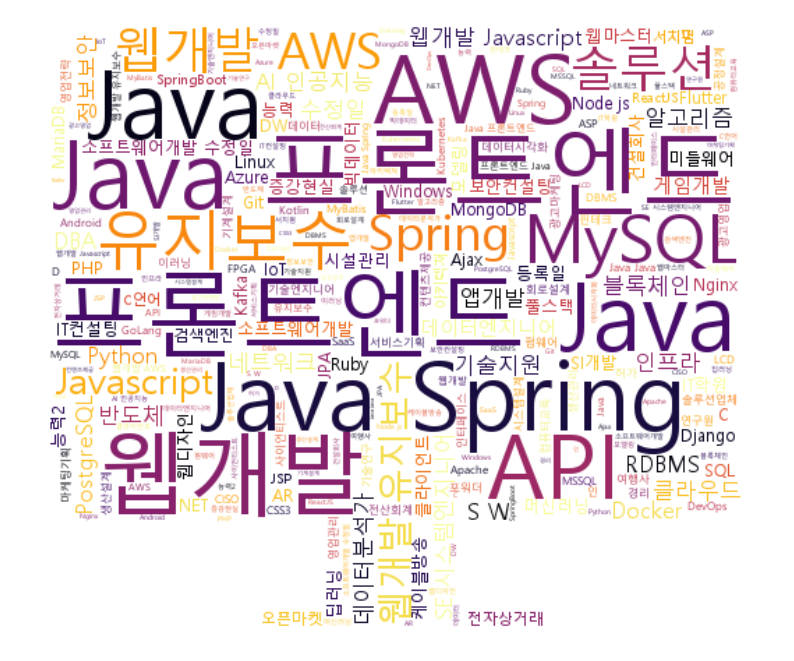

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import platform

if platform.system() == "Windows":
    font_path = r"C:\Windows\Fonts\malgun.ttf"
elif platform.system() == "Darwin":
    font_path = r'/System/Library/Fonts/AppleGothic.ttf'
else:
    font_path = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

txtFile = open(r"C:\Hwan\web Scraping\project\job_data_word.txt", encoding='utf-8').read()

print("STOPWORDS : ", STOPWORDS)

img_mask = np.array(Image.open(r"C:\Hwan\web Scraping\project\computer.PNG"))

wordcloud = WordCloud(font_path=font_path, width=400, height=400, background_color="white",
                      max_font_size=200, stopwords=STOPWORDS, repeat=True,
                      colormap="inferno", mask=img_mask).generate(txtFile)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
df_combined["능력"].isna().sum()

0

In [29]:
df_ability = df_combined["능력"].dropna()

### 가정: 제일 앞에 오는 것이 가장 큰 요구사항이라 생각하고 시각화를 진행

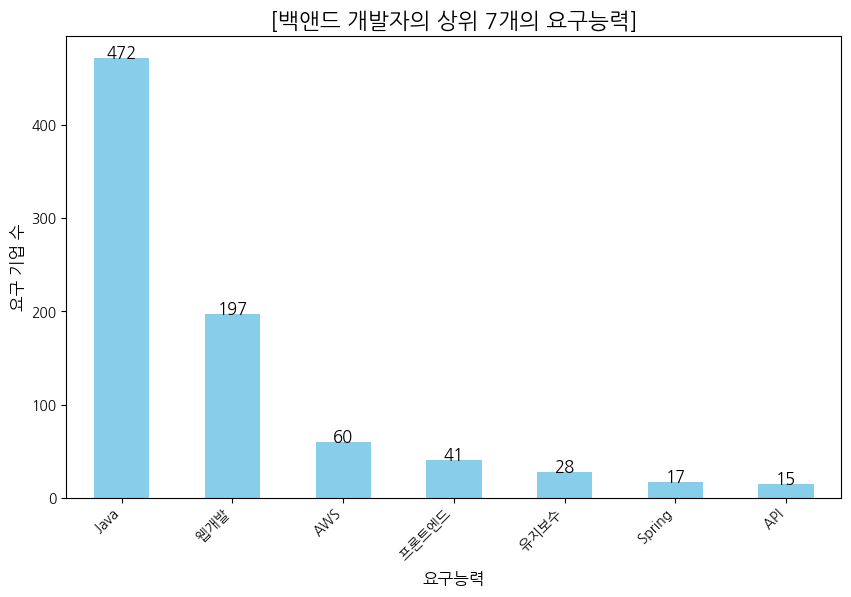

In [30]:
import koreanize_matplotlib 

ability_counts = df_ability.value_counts()
top_7_abilities = ability_counts.head(7)

plt.figure(figsize=(10, 6))
top_7_abilities.plot(kind='bar', color='skyblue')
plt.title("[백앤드 개발자의 상위 7개의 요구능력]", fontsize=16)
plt.xlabel("요구능력", fontsize=12)
plt.ylabel("요구 기업 수", fontsize=12)
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_7_abilities):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=12)
plt.show()

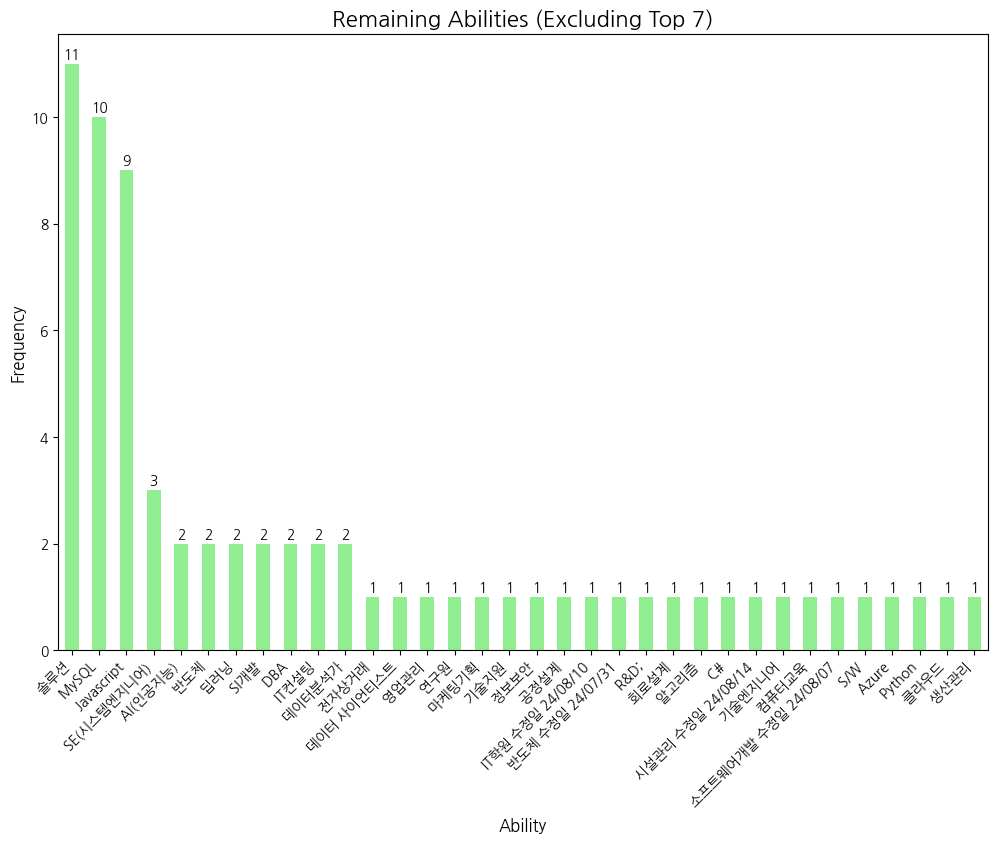

In [31]:
remaining_abilities = ability_counts[7:]

plt.figure(figsize=(12, 8))
bars = remaining_abilities.plot(kind='bar', color='lightgreen')
plt.title("Remaining Abilities (Excluding Top 7)", fontsize=16)
plt.xlabel("Ability", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(remaining_abilities):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=10)

plt.show()

In [32]:
if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable

def search_job(number):
    try:
        search_word = quote('백엔드')
        url = f'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&recruitPage={number}&recruitPageCount=100&searchType=search&searchword={search_word}'

        urlrequest = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(urlrequest)

        soup = BeautifulSoup(html, 'html.parser')
        
        contents = soup.find('div', {'class': 'content'})
        if contents is None:
            print(f"Page {number}: No content found.")
            return []
        
        items = contents.select('div.item_recruit > div.area_job > div.job_condition')
        if not items:
            print(f"Page {number}: No job items found.")
            return []

        data = []
        for item in items:
            item_string = item.text.replace('\n', '').strip()
            data.append(item_string)
        return data

    except Exception as e:
        print(f"Error on page {number}: {e}")
        return []

all_data = []
for i in range(1, 10):
    all_data.extend(search_job(i))

if all_data:
    with open('career.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for row in all_data:
            writer.writerow([row])
else:
    print("No data found.")

In [33]:
df = pd.read_csv('career.csv', header=None, encoding='utf-8')

df_split = df[0].str.split(' ', expand=True)

df_split.to_csv('career_split.csv', index=False, encoding='utf-8')

df_split

,0,1,2,3,4,5,6,7,8
0,서울,중구,신입·경력,대졸↑,정규직,None,None,None,None
1,서울,강서구,신입·경력,대졸↑,정규직,None,None,None,None
2,서울,서초구,경력,1~9년,대졸↑,정규직·계약직,None,None,None
3,대전,유성구,신입·경력,초대졸↑,정규직,None,None,None,None
4,경기전체,신입·경력,초대졸↑,정규직,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
895,서울,마포구,경력,1~10년,고졸↑,정규직,None,None,None
896,경기,안산시,단원구,신입·경력,고졸↑,교육생,None,None,None
897,대구,동구,경력2년↑,대졸↑,정규직,"3,360",만원,None,None
898,대구,수성구,신입·경력,대졸↑,정규직,None,None,None,None


In [34]:
career_df = df_split.drop([5, 6, 7, 8], axis = 1)
career_df

,0,1,2,3,4
0,서울,중구,신입·경력,대졸↑,정규직
1,서울,강서구,신입·경력,대졸↑,정규직
2,서울,서초구,경력,1~9년,대졸↑
3,대전,유성구,신입·경력,초대졸↑,정규직
4,경기전체,신입·경력,초대졸↑,정규직,None
...,...,...,...,...,...
895,서울,마포구,경력,1~10년,고졸↑
896,경기,안산시,단원구,신입·경력,고졸↑
897,대구,동구,경력2년↑,대졸↑,정규직
898,대구,수성구,신입·경력,대졸↑,정규직


In [35]:
company_list = ["정규직", "계약직", "정규직·계약직"]

filtered_df = career_df[career_df[4].isin(company_list)]

filtered_df

filtered_df.to_csv('filtered_career.csv', index=False, encoding='utf-8')


In [37]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,0,1,2,3,4
0,서울,중구,신입·경력,대졸↑,정규직
1,서울,강서구,신입·경력,대졸↑,정규직
2,대전,유성구,신입·경력,초대졸↑,정규직
3,서울,영등포구,경력무관,학력무관,정규직
4,서울,송파구,신입·경력,대졸↑,정규직
...,...,...,...,...,...
451,인천,연수구,신입·경력,학력무관,정규직
452,서울,강남구,신입·경력,초대졸↑,정규직
453,대구,동구,경력2년↑,대졸↑,정규직
454,대구,수성구,신입·경력,대졸↑,정규직


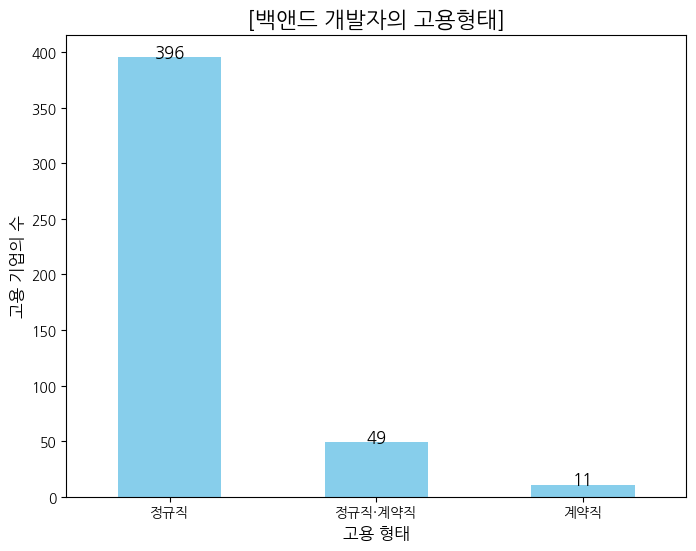

In [41]:
filtered_df = career_df[career_df[4].isin(company_list)]

filtered_df = filtered_df.reset_index(drop=True)

value_counts = filtered_df[4].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title("[백앤드 개발자의 고용형태]", fontsize=16)
plt.xlabel("고용 형태", fontsize=12)
plt.ylabel("고용 기업의 수", fontsize=12)
plt.xticks(rotation=0)
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=12)
plt.show()

In [42]:
column_2_data = career_df[2].dropna()

with open('column_2_data.txt', 'w', encoding='utf-8') as file:
    for item in column_2_data:
        file.write(str(item) + '\n')

STOPWORDS :  {'his', 'for', 'too', "how's", 'www', 'been', 'before', 'you', 'she', 'ought', 'also', 'which', 'an', 'below', 'each', "when's", 'http', 'as', 'at', "wouldn't", 'if', 'after', 'ever', 'was', "we're", 'not', "shan't", 'so', "he's", "couldn't", 'than', 'he', "you've", "you'd", 'do', 'on', 'myself', "mustn't", 'therefore', 'with', 'further', 'until', 'by', 'cannot', 'to', 'had', 'yourself', "aren't", "don't", 'other', 'only', 'here', 'we', 'yours', 'during', 'our', 'having', "i'd", "who's", 'few', 'get', "you'll", 'or', "they'll", "it's", 'being', 'com', 'no', 'there', "i'm", 'them', "didn't", 'be', "she's", 'but', 'how', "haven't", 'it', 'any', 'a', 'otherwise', 'and', "we've", 'above', 'in', 'did', 'does', 'have', 'once', 'into', "isn't", 'over', "can't", "that's", 'why', "i'll", 'just', 'my', 'me', "she'd", 'who', "we'd", 'down', 'whom', 'would', 'they', "i've", "let's", 'yourselves', 'all', 'hence', 'k', 'has', "why's", "they've", 'up', 'under', 'doing', 'very', 'through'

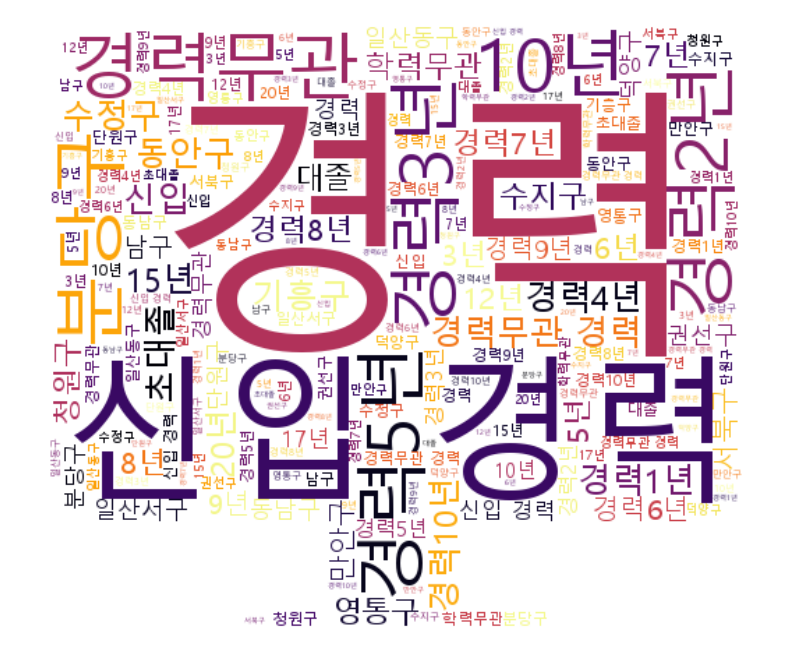

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import platform

if platform.system() == "Windows":
    font_path = r"C:\Windows\Fonts\malgun.ttf"
elif platform.system() == "Darwin":
    font_path = r'/System/Library/Fonts/AppleGothic.ttf'
else:
    font_path = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

txtFile = open(r"C:\Hwan\web Scraping\project\column_2_data.txt", encoding='utf-8').read()

print("STOPWORDS : ", STOPWORDS)

img_mask = np.array(Image.open(r"C:\Hwan\web Scraping\project\computer.PNG"))

wordcloud = WordCloud(font_path=font_path, width=400, height=400, background_color="white",
                      max_font_size=200, stopwords=STOPWORDS, repeat=True,
                      colormap="inferno", mask=img_mask).generate(txtFile)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()